# Create Graphics

In [1]:
from pathlib import Path

import pandas as pd

BOOK_COUNT_CLEANED_DF = Path('./data/book_counts_cleaned.csv')

In [2]:
book_ranking = pd.read_csv(BOOK_COUNT_CLEANED_DF, index_col=0)

## Ranking by Posts and Comments

In [3]:
# Absolute ranking:
absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
absolute_rank = pd.DataFrame(absolute_rank[['Occurrences']].reset_index())
absolute_rank

,Title,Normalized Title,Occurrences
0,Dune,dune,2306
1,1984,1984,2230
2,The Hunger Games,hungergames,1174
3,Infinite jest,infinitejest,1040
4,The Hobbit,hobbit,999
...,...,...,...
21293,The 22 immutable laws of branding,22immutablelawsofbranding,1
21294,The 22 Murders of Madison May,22murdersofmadisonmay,1
21295,The 2-hour job search,2hourjobsearch,1
21296,The 13th valley,13thvalley,1


In [4]:
def remove_synonyms(rank_df):
    synonyms = {('darktower', 'darktowers'), ('50shadesofgrey', 'fiftyshadesofgrey')}

    for syn1, syn2 in synonyms:
        count1 = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][2]
        count2 = rank_df.loc[rank_df['Normalized Title'] == syn2].values[0][2]
        title = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][0]
        new_col = pd.DataFrame([[title, syn1, count1+count2]], columns=['Title', 'Normalized Title', 'Occurrences'])

        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn1].index)
        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn2].index)

        rank_df = pd.concat([rank_df, new_col])

        rank_df.sort_values('Occurrences', ascending=False)

        rank_df = rank_df.sort_values('Occurrences', ascending=False)
        rank_df = rank_df.reset_index(drop=True)
        return rank_df[:100]

In [5]:
def plot_ranking(ranking, title, y_axis="Occurrences in Posts and Comments", x_axis="Book Title"):
    p = ranking.sort_values(by='Occurrences').plot(kind='barh', x='Title', figsize=(5, 5), zorder=2)
    p.set_title(title)
    p.set_xlim(0, 2500)
    p.set_xlabel(y_axis, labelpad=20, weight='bold', size=12)
    p.set_ylabel(x_axis, labelpad=20, weight='bold', size=12)

    vals = p.get_xticks()
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    for tick in vals:
        p.axvline(x=tick, alpha=0.4, color='#eeeeee', zorder=1)

    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    p.spines['left'].set_visible(False)
    p.spines['bottom'].set_visible(False)
    p.get_legend().remove()

In [6]:
post_and_comments_ranked = remove_synonyms(absolute_rank)
post_and_comments_ranked.to_csv('./data/Top-100.csv')
post_and_comments_ranked

,Title,Normalized Title,Occurrences
0,Dune,dune,2306
1,1984,1984,2230
2,The Hunger Games,hungergames,1174
3,Infinite jest,infinitejest,1040
4,The Hobbit,hobbit,999
...,...,...,...
95,The Sound and the Fury,soundandthefury,189
96,The haunting of Hill House,hauntingofhillhouse,188
97,Watchmen,watchmen,187
98,A Farewell to Arms,farewelltoarms,187


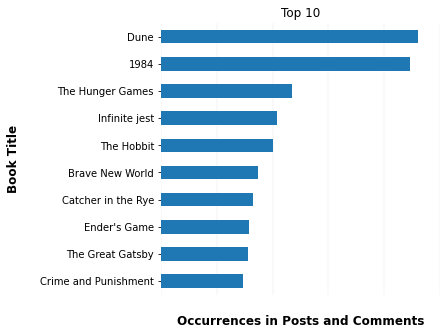

In [7]:
plot_ranking(post_and_comments_ranked[:10], 'Top 10')

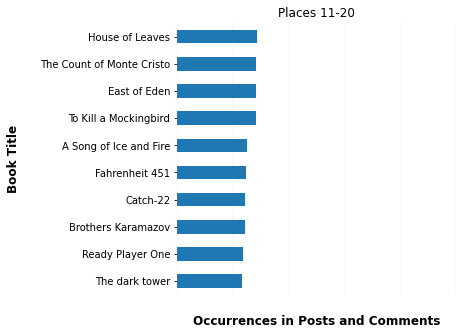

In [8]:
plot_ranking(post_and_comments_ranked[10:20], 'Places 11-20')

## Rank by Post Texts

In [9]:
post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
post_rank = pd.DataFrame(post_rank[['Occurrences']].reset_index())
post_rank

,Title,Normalized Title,Occurrences
0,Dune,dune,2104
1,1984,1984,2079
2,The Hunger Games,hungergames,1136
3,Infinite jest,infinitejest,1023
4,The Hobbit,hobbit,907
...,...,...,...
21293,Solitude Creek,solitudecreek,1
21294,Soloalbum,soloalbum,1
21295,Some Kind Of Fairy Tale,somekindoffairytale,1
21296,Some boys,someboys,1


In [10]:
post_rank = remove_synonyms(post_rank)

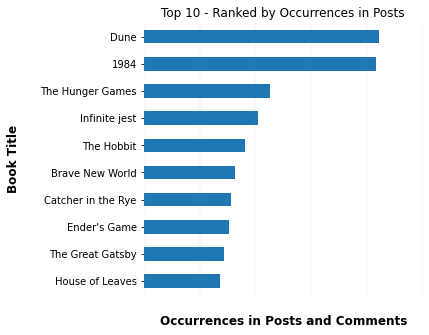

In [11]:
plot_ranking(post_rank[:10], 'Top 10 - Ranked by Occurrences in Posts')

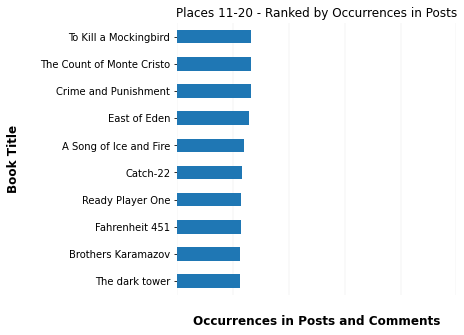

In [12]:
plot_ranking(post_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Posts')

## Rank by Comments Texts

In [13]:
comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
comment_rank = pd.DataFrame(comment_rank[['Occurrences']].reset_index())
comment_rank

,Title,Normalized Title,Occurrences
0,Dune,dune,202
1,1984,1984,151
2,The Hobbit,hobbit,92
3,A Little Life,littlelife,85
4,Crime and Punishment,crimeandpunishment,82
...,...,...,...
6536,Galapagos,galapagos,1
6537,Starting Over,startingover,1
6538,Galactic empires,galacticempires,1
6539,State of confusion,stateofconfusion,1


In [14]:
comment_rank = remove_synonyms(comment_rank)

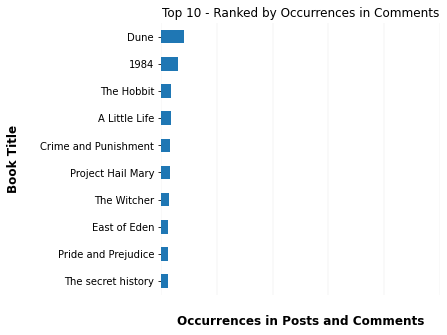

In [15]:
plot_ranking(comment_rank[:10], 'Top 10 - Ranked by Occurrences in Comments')

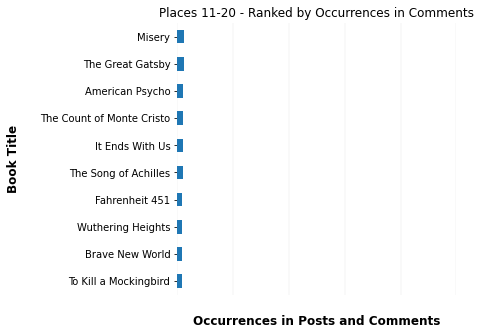

In [16]:
plot_ranking(comment_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Comments')

## Top 100

|     |Title                               |Occurrences|
|-----|------------------------------------|-----------|
| 0   |Dune                                |2306       |
| 1   |1984                                |2230       |
| 2   |The Hunger Games                    |1174       |
| 3   |Infinite jest                       |1040       |
| 4   |The Hobbit                          |999        |
| 5   |Brave New World                     |866        |
| 6   |Catcher in the Rye                  |821        |
| 7   |Ender's Game                        |788        |
| 8   |The Great Gatsby                    |778        |
| 9   |Crime and Punishment                |738        |
| 10  |House of Leaves                     |717        |
| 11  |The Count of Monte Cristo           |709        |
| 12  |To Kill a Mockingbird               |708        |
| 13  |East of Eden                        |708        |
| 14  |A Song of Ice and Fire              |626        |
| 15  |Fahrenheit 451                      |613        |
| 16  |Catch-22                            |610        |
| 17  |Brothers Karamazov                  |602        |
| 18  |Ready Player One                    |591        |
| 19  |The dark tower                      |583        |
| 20  |The hitchhiker's guide to the galaxy|546        |
| 21  |Animal Farm                         |538        |
| 22  |Pride and Prejudice                 |523        |
| 23  |American Gods                       |506        |
| 24  |The Odyssey                         |493        |
| 25  |Slaughterhouse-Five                 |488        |
| 26  |American Psycho                     |482        |
| 27  |Dark Towers                         |481        |
| 28  |The Name of the Wind                |460        |
| 29  |Atlas Shrugged                      |452        |
| 30  |Misery                              |447        |
| 31  |A Little Life                       |438        |
| 32  |The Alchemist                       |428        |
| 33  |The Handmaid's Tale                 |416        |
| 34  |The Witcher                         |403        |
| 35  |11/22/63                            |400        |
| 36  |Gravity's Rainbow                   |388        |
| 37  |Fight club                          |388        |
| 38  |50 Shades of Grey                   |386        |
| 39  |Lord of the Flies                   |377        |
| 40  |The Grapes of Wrath                 |356        |
| 41  |Neuromancer                         |350        |
| 42  |Kafka on the Shore                  |349        |
| 43  |Wuthering Heights                   |337        |
| 44  |Flowers for Algernon                |336        |
| 45  |Gone Girl                           |336        |
| 46  |1Q84                                |332        |
| 47  |The secret history                  |332        |
| 48  |Gunslinger                          |329        |
| 49  |A Clockwork Orange                  |324        |
| 50  |Of Mice and Men                     |317        |
| 51  |Norwegian wood                      |314        |
| 52  |Jurassic Park                       |308        |
| 53  |Divergent                           |299        |
| 54  |One Hundred Years of Solitude       |294        |
| 55  |The inferno                         |289        |
| 56  |The Stormlight Archive              |286        |
| 57  |His Dark Materials                  |280        |
| 58  |Cloud Atlas                         |278        |
| 59  |Cat's Cradle                        |277        |
| 60  |Les Misérables                      |275        |
| 61  |The Way of Kings                    |266        |
| 62  |Captivated                          |266        |
| 63  |World War Z                         |259        |
| 64  |The Book Thief                      |257        |
| 65  |The old man and the sea             |254        |
| 66  |Project Hail Mary                   |247        |
| 67  |Kite Runner                         |246        |
| 68  |The Picture of Dorian Gray          |245        |
| 69  |Heart of Darkness                   |242        |
| 70  |Red Rising                          |242        |
| 71  |Until the End                       |240        |
| 72  |The Goldfinch                       |237        |
| 73  |Salem's Lot                         |234        |
| 74  |Never let me go                     |233        |
| 75  |The Silmarillion                    |232        |
| 76  |The Song of Achilles                |230        |
| 77  |The Fountainhead                    |226        |
| 78  |Snow Crash                          |221        |
| 79  |And Then There Were None            |220        |
| 80  |Do Androids Dream of Electric Sheep?|218        |
| 81  |The Bell Jar                        |214        |
| 82  |Normal People                       |214        |
| 83  |Good Omens                          |214        |
| 84  |The Fault in Our Stars              |209        |
| 85  |Wind-Up Bird Chronicle              |208        |
| 86  |Little Women                        |204        |
| 87  |Watership Down                      |204        |
| 88  |Girl With the Dragon Tattoo         |204        |
| 89  |The Maze Runner                     |203        |
| 90  |The Divine Comedy                   |201        |
| 91  |The Little Prince                   |199        |
| 92  |The Godfather                       |199        |
| 93  |The Human Condition                 |195        |
| 94  |A Tale of Two Cities                |190        |
| 95  |The Sound and the Fury              |189        |
| 96  |The haunting of Hill House          |188        |
| 97  |Watchmen                            |187        |
| 98  |A Farewell to Arms                  |187        |
| 99  |For Whom the Bell Tolls             |186        |
